# Chapter 8 Exercises

1. What are the main motivations for reducing a dataset's dimensionality? What are the main drawbacks? 
 - A main motivation is that it makes training a model much faster and easier. Sometimes it can reduce noise in the data and make the model more accurate as well. 
 - Typically, dimensionality reduction will result in worse performance of a model. If this degredation in performance is small and the gains in efficiency are large then the trade off may be worth it. 
 - <font color='red'>to visualize the data</font> 
2. What is the curse of the dimensionality? 
 - In high dimensional space, most values are "extreme" values in that they lie near one of the borders of the space. 
 - Additionally, the distances between points gets larger, this has two drawbacks. First, it makes it much more difficult to thoroughly sample high dimensionality spaces. Second, it reduces the relative variance for the distance between points. 
3. Once a dataset's dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why? 
 - Yes it is possible to reduce the operation with an inverse transform. Although this is more difficult for kernel PCA. 
 - However, the original data may not be reproduced with 100% accuracy. The difference between the original data and the reconstructed data is the reconstruction error. 
 - However, much variance you are able to retain during the dimensionality reduction is the accuracy with which you will be able to reconstruct the data. So if you retain 95% of the variance you will have a reconstruction error of 5%. 
4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset? 
 - No, you would need a manifold approach to do that. 
 - But yes if you used kernel PCA? 
 - <font color='red'>Yes, as long as there are useless dimensions in the data.</font>
5. Suppose you perform PCA on a 1000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have? 
 - Unkown. The variance could be even distributed across all dimensions, in which case you would have 950 dimensions. Or it could all be contained in a single axis in which case you would have 1 dimension. 
6. In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA, or Kernel PCA? 
 - Incremental PCA should be used when you have a large dataset which cannot fit in memory. <font color='red'>And when adding new data online.</font> 
 - Randomized PCA should be used when you have many more training instances than dimensions and need efficiency. 
 - Kernel PCA should be used when vanilla PCA fails and you want to do a better job retaining clusters of data. Or if the data are non-linear in their current dimensionality. 
 - Vanilla PCA should be used at the drop of a hat. <font color='red'>It should be used as the default assuming the dataset fits in memory.</font>. 
7. How can you evaluate the performance of a dimensionaliy reduction algorithm on your dataset? 
 - You can measure the retained variance relative to the how many dimensions were eliminated. A large dimensionality reduction while retaining most of the variance is good. 
 - You can perform an inverse transform and compare the reconstructed data to the original data (reconstruction error). 
 - You can use existing labels to evaluate how well it preserves certain clusters in the reduced dimensions. 
 - <font color='red'>You can also measure the change in performance of a supervised learning algorithm which uses the data before vs after the dimensionality reduciton.</font>
8. Does it make any sense to chain two different dimensionality reduction algorithms? 
 - Perhaps using a highly efficient dimensionality reduction first then using a more computationally intensive, non-linear dimensionality reduction to maximally reduce the dimensionality would work. But it seems like a bad idea. 

## 9. Load MNIST
- split into 60k/10k training/test datasets, 
- train a random forst classifer, 
- use PCA to reduce dimensionality but keep 95% of variance,
- evaluate performance of random forest classifer relative to its poerformance without PCA. 
- keep track of time required to train. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from scipy.io import loadmat

In [2]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

In [3]:
mnist = loadmat("mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]

In [4]:
np.unique(mnist['label'])

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [5]:
print(mnist.keys())
print(mnist_data.shape)
print(mnist_label.shape)
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_label, 
    test_size=10000, random_state=42)

dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])
(70000, 784)
(70000,)


In [6]:
print(X_test.shape)
print(X_train.shape)

(10000, 784)
(60000, 784)


In [7]:
y_train[0:10]

array([3., 5., 3., 3., 1., 5., 2., 6., 4., 3.])

In [22]:
clf  = RandomForestClassifier()
tic = time.time()
clf.fit(X_train, y_train)
toc = time.time()
clf_run_time = toc - tic
print(clf_run_time)
#first run took 38 seconds
#second run also took 38 seconds

38.07411456108093


In [8]:
#retrying rand clf with n_estimators set to 10 instead of the defaut of 100
clf  = RandomForestClassifier(n_estimators=10)
tic = time.time()
clf.fit(X_train, y_train)
toc = time.time()
clf_run_time = toc - tic
print(clf_run_time)
# 4 seconds 

4.006585597991943


In [8]:
pca = PCA(n_components = 0.95)
X_train_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_.sum())
print(pca.explained_variance_ratio_.shape)
print(X_train_pca.shape)

0.9503998643877183
(154,)
(60000, 154)


In [12]:
clf_pca  = RandomForestClassifier(n_estimators=10)
tic = time.time()
clf_pca.fit(X_train_pca, y_train)
toc = time.time()
clf_pca_run_time = toc - tic
print(clf_pca_run_time)
#first run took 86 seconds
#adjusted hyperparams so n_estimators =10 instead of 100
# took 8.33 seconds

8.334952354431152


In [ ]:
#evaluate the models

In [14]:
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
conf_mat = confusion_matrix(y_train, y_train_pred)

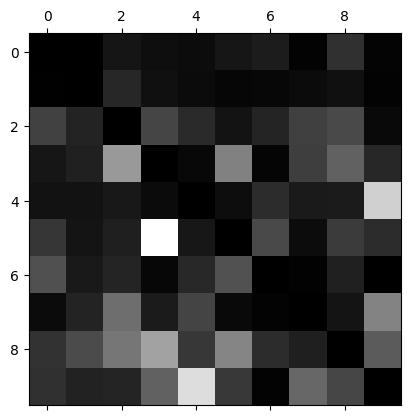

In [15]:
row_sums = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat = conf_mat/ row_sums
np.fill_diagonal(norm_conf_mat, 0)

plt.matshow(norm_conf_mat, cmap=plt.cm.gray)
plt.show()

In [16]:
norm_conf_mat.max()

0.034853540971449756

In [18]:
#vanilla rfc
y_pred = clf.predict(X_test)
# for n_estimators = 100
#accuracy=0.97

# for n_estimators = 10
#accuracy=0.95

In [20]:
print(classification_report(y_test, y_pred, labels=np.unique(mnist['label'])))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       982
         1.0       0.98      0.98      0.98      1124
         2.0       0.93      0.96      0.94       999
         3.0       0.93      0.92      0.93      1008
         4.0       0.93      0.96      0.94       928
         5.0       0.93      0.93      0.93       919
         6.0       0.98      0.97      0.98      1032
         7.0       0.96      0.95      0.96      1069
         8.0       0.93      0.91      0.92       986
         9.0       0.94      0.91      0.92       953

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [21]:
#pca - rfc
X_test_pca = pca.transform(X_test)
y_pred_pca = clf_pca.predict(X_test_pca)
# for n_estimators = 100
#accuracy=0.95

# for n_estimators = 10
#accuracy=0.89

In [22]:
print(classification_report(y_test, y_pred_pca, labels=np.unique(mnist['label'])))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       982
         1.0       0.97      0.98      0.97      1124
         2.0       0.85      0.91      0.88       999
         3.0       0.82      0.86      0.84      1008
         4.0       0.86      0.90      0.88       928
         5.0       0.85      0.80      0.83       919
         6.0       0.94      0.94      0.94      1032
         7.0       0.91      0.91      0.91      1069
         8.0       0.87      0.78      0.82       986
         9.0       0.89      0.82      0.85       953

    accuracy                           0.89     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.89      0.89     10000



<font color='red'>Checked the solutions notedbook and indeed, using PCA before a random forest classifier reduces performance sharply AND prolongs the training time. They suggest trying a softmax classifeir after PCA. So I will try that. </font> 

In [23]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs",)

tic = time.time()
lr_clf.fit(X_train, y_train)
toc = time.time()
lr_run_time = toc - tic
print(lr_run_time)

9.202961921691895


C:\Users\18177\anaconda3\envs\BME890_env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
y_pred = lr_clf.predict(X_test)
print(classification_report(y_test, y_pred, labels=np.unique(mnist['label'])))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       982
         1.0       0.96      0.97      0.97      1124
         2.0       0.92      0.91      0.91       999
         3.0       0.91      0.90      0.90      1008
         4.0       0.93      0.94      0.93       928
         5.0       0.89      0.88      0.88       919
         6.0       0.96      0.95      0.95      1032
         7.0       0.94      0.93      0.93      1069
         8.0       0.88      0.89      0.88       986
         9.0       0.88      0.89      0.89       953

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [27]:
lr_clf_pca = LogisticRegression(multi_class="multinomial", solver="lbfgs",)

tic = time.time()
lr_clf_pca.fit(X_train_pca, y_train)
toc = time.time()
lr_pca_run_time = toc - tic
print(lr_pca_run_time)

4.142066240310669


C:\Users\18177\anaconda3\envs\BME890_env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
X_test_pca = pca.transform(X_test)
y_pred_pca = lr_clf_pca.predict(X_test_pca)

print(classification_report(y_test, y_pred_pca, labels=np.unique(mnist['label'])))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       982
         1.0       0.94      0.98      0.96      1124
         2.0       0.92      0.90      0.91       999
         3.0       0.90      0.89      0.89      1008
         4.0       0.91      0.94      0.93       928
         5.0       0.89      0.86      0.88       919
         6.0       0.94      0.95      0.94      1032
         7.0       0.93      0.93      0.93      1069
         8.0       0.89      0.86      0.87       986
         9.0       0.89      0.87      0.88       953

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.92      0.92      0.92     10000



# 10 Use t-SNE to reduce MNIST down to two dimensions
 - plot the results using matplotlib with 10 colors
 - Compare with visualisation for PCA and LLE

In [9]:
tic = time.time()
tsne = TSNE(n_components = 2)
X_train_tsne = tsne.fit_transform(X_train)
toc = time.time()
print(toc-tic)
print(X_train_tsne.shape)

(60000, 2)


In [10]:
pca2 = PCA(n_components = 2)
X_train_pca2 = pca2.fit_transform(X_train)
print(pca2.explained_variance_ratio_.sum())
print(pca2.explained_variance_ratio_.shape)
print(X_train_pca2.shape)

0.16911843017781272
(2,)
(60000, 2)


In [11]:
from sklearn.manifold import LocallyLinearEmbedding

In [15]:
X_train[::50].shape

(1200, 784)

In [16]:
lle = LocallyLinearEmbedding(n_components = 2)
X_train_lle = lle.fit_transform(X_train[::50])
print(X_train_lle.shape)

(1200, 2)


In [18]:
import matplotlib.cm as cm

In [19]:
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(mnist['label']))))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.80392157e-01, 3.38158275e-01, 9.85162233e-01, 1.00000000e+00],
       [6.07843137e-02, 6.36474236e-01, 9.41089253e-01, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [3.86274510e-01, 9.84086337e-01, 7.67362681e-01, 1.00000000e+00],
       [6.13725490e-01, 9.84086337e-01, 6.41213315e-01, 1.00000000e+00],
       [8.33333333e-01, 8.66025404e-01, 5.00000000e-01, 1.00000000e+00],
       [1.00000000e+00, 6.36474236e-01, 3.38158275e-01, 1.00000000e+00],
       [1.00000000e+00, 3.38158275e-01, 1.71625679e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

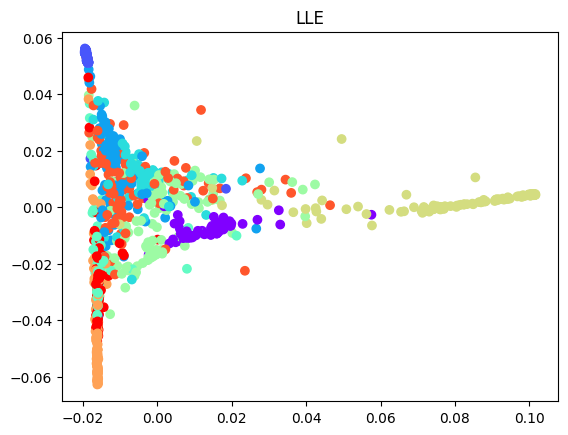

In [31]:
plt.scatter(X_train_lle[:,0], X_train_lle[:,1], c=y_train[::50], cmap='rainbow')
plt.title('LLE')
plt.show()

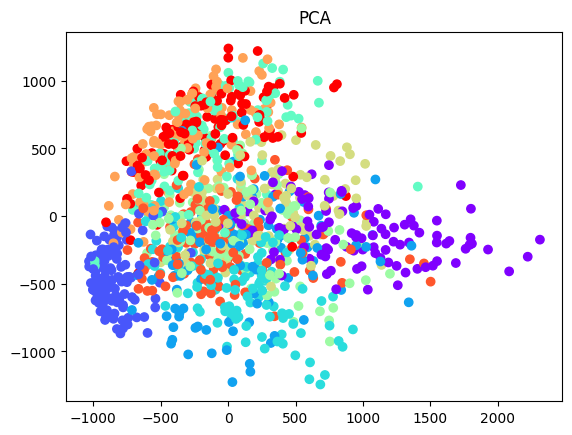

In [30]:
plt.scatter(X_train_pca2[::50,0], X_train_pca2[::50,1], c=y_train[::50], cmap='rainbow')
plt.title('PCA')
plt.show()

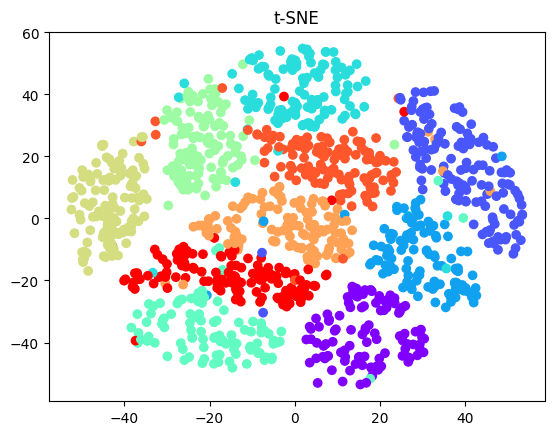

In [32]:
plt.scatter(X_train_tsne[::50,0], X_train_tsne[::50,1], c=y_train[::50], cmap='rainbow')
plt.title('t-SNE')
plt.show()